# Unit 5 Classwork

The goals of this assignment are to help you (1) use numerical simulation to analyze and interpret important statistical inference quantities, (2) calculate probabilities using `R`, and (3) estimate probabilities and other quantities through numerical (computer) simulation. Such simulations can be useful. We can use simulations to help confirm that we've calculated a probability "by hand" correctly, or to estimate other quantities, like areas/integrals.


## Problem #1

Let $\widehat{\theta}$ be an estimator of the parameter $\theta$ (e.g., we might think of $\widehat{\theta} = \bar{X}$ and $\theta = \mu$, where $\mu$ is a population mean). We say that $\widehat{\theta}$ is *unbiased* if $E(\widehat{\theta}) = \theta$.

**1.(a) Let $X_1,...,X_n \stackrel{iid}\sim \text{Pois}(\lambda).$ Find an unbiased estimator for $\lambda$.**

**1.(b) Let $X_1,...,X_n \stackrel{iid}\sim \text{Exp}(\lambda).$ Find the maximum likelihood estimator (MLE) for $\lambda$.**

## Problem #2 (Optional for STAT 4000 Students)

Let $X_1,...,X_n$ be an i.i.d. sample from a population with mean $\mu$ and variance $\sigma^2$.

**2.(a)   Show that 
\begin{align*}
    S^2 = \frac{1}{n-1}\sum^n_{i=1}(X_i - \bar{X})^2
\end{align*}
is an unbiased estimator of $\sigma^2$. This answers the question of why we divide by $n-1$ in $S^2$!**

**2.(b)Assume that $E\left[ \sqrt{X} \right] < \sqrt{E(X)}$. Show that $S$ is a *biased* estimator of $\sigma$.**

**2.(c) Use simulations to provide some evidence that $S$ is biased. Specifically:**

1. Generate `m = 500` different samples of size `n = 5` from $\text{Exp}(\lambda = 1)$.
2. Calculate $S$ for each sample.
3. What is the mean of the distribution of $S$? 
4. Creat a histogram of the distribution of $S$. Comment on the distribution. How does this provide evidence that $S$ is biased?


[1] 0.8793402

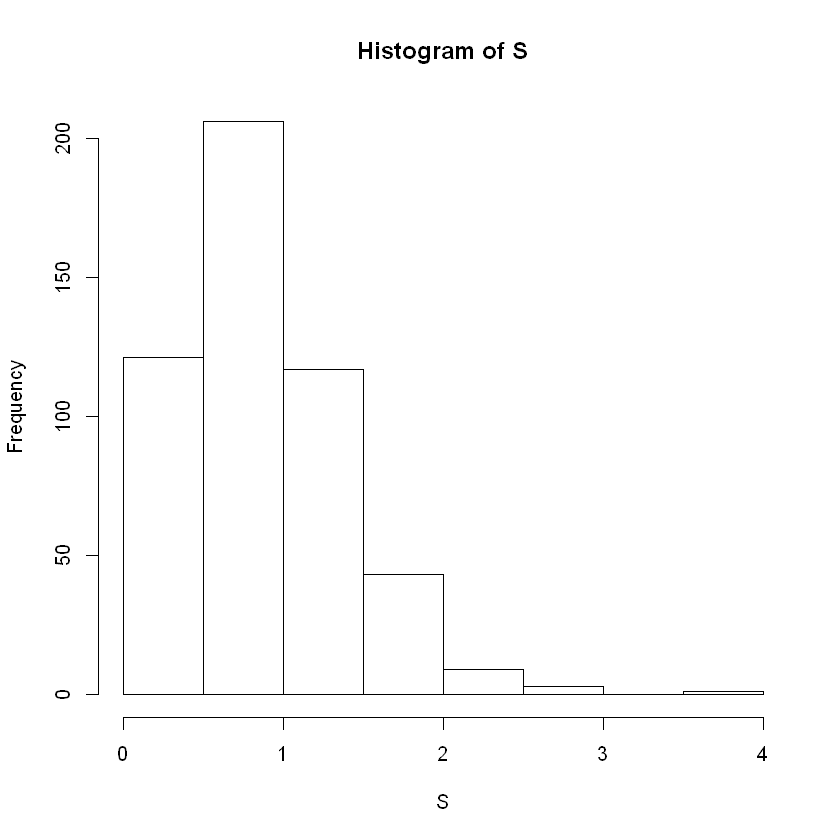

In [14]:
m = 500
n = 5
set.seed(123)
x = t(replicate(m, expr=rexp(5,1)))
S = apply(x,1,sd)
mean(S)
hist(S)


The distribution of S is right/positively skewed. Mean of S here is 0.87 and it's less than true std of 1 and it shows that S is a biased estimator of sigma(sd). It implies as same as the $$\mathbb{E}[\sqrt{X}] < \sqrt{\mathbb{E}[X]}$$ So S is a biased estimator by this evidence.

**2.(d) Repeat the process described in (e) for $S^2$. What do you notice?**

[1] 1.021564

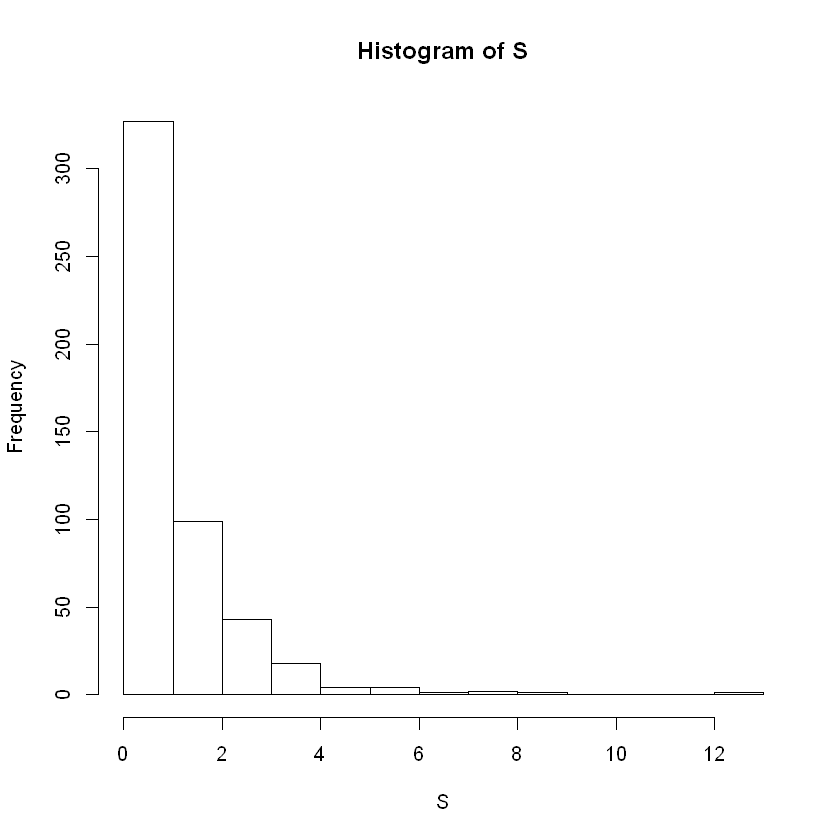

In [12]:
m = 500
n = 5
set.seed(123)
x = t(replicate(m, expr=rexp(5,1)))
S = apply(x,1,var)
mean(S)
hist(S)

sample standard deviation is biased and sample variance is not because if we change the value of 'm' the true variance will approach to 1 and it won't be biased. And the S remains biased even if we change the sample size 'm'.

## Problem #3

A response time is normally distributed with standard deviation of 25 milliseconds. A new system has been installed, and we wish to estimate the true average response time, $\mu$, for the new environment. 

**Assuming that the response times are still normally distributed with $\sigma = 25$, what sample size is necessary to ensure that the resulting $95\%$ confidence has a width of (at most) $10$?**

In [20]:
# 2*z_crt*sigma/sqrt(n) = 10
# (2*z_crt*sigma/10)^2 = n

sigma = 25
alpha = 0.05
z_crit = qnorm(1-alpha/2,0,1)
n = (2*z_crit*sigma/10)^2
n

[1] 96.03647

n should be atleast 97

## Problem #4

The dataset contained in the file `winequality-red.csv` is related to a red Portuguese "Vinho Verde" wine. Make sure you download it from Canvas, and load it with the following code:

In [25]:
wine = read.table("winequality-red.csv", header = TRUE, sep=",")
head(wine)
dim(wine)

X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


[1] 1599   13

**Calculate a 90% confidence interval for the mean $\text{pH}$ level.**

In [28]:
alpha = 0.1
n = length(wine$pH)
s = sd(wine$pH)
xbar = mean(wine$pH)
z_score = qnorm(1-alpha/2,0,1)

lower_CI = xbar - z_score * s / sqrt(n)
upper_CI = xbar + z_score * s / sqrt(n)

lower_CI
upper_CI

[1] 3.304763

[1] 3.317464

## Problem #5

In this example, we will construct a simulation to verify the “coverage properties” of a confidence interval for the mean of a normal distribution.

**5.(a) Simulate a matrix with `m = 1000` rows and `n = 100` columns, where each entry is a random number from the population model $N(0, 1)$. Interpret each row as a sample from the population.**


In [1]:
m = 1000
n = 100

set.seed(27)
x = t(replicate(m, rnorm(n, 0, 1)))
head(x)

1.90716256,1.1448769,-0.76453074,-1.4574325,-1.0934689,0.295241218,0.006885942,1.1574109,2.1346379,0.23784461,...,-0.4624085,-0.5699504,1.4104926,-0.001317237,-0.6473553,0.5706706,-0.2866201,1.22077188,0.8008214,-0.4989064
0.44197317,1.6338766,-0.13137608,0.1680593,1.0169366,0.113106511,0.065358330,0.2614911,0.5129595,-0.28140273,...,1.7560754,1.0450613,-2.5394225,-0.583217723,0.5879156,1.0923020,0.7109421,0.08896238,2.5514585,1.5711233
-0.45379998,-0.4078867,0.18792487,-0.9008257,1.2479190,-0.348302328,-0.933590523,-0.9580862,-1.0186299,-0.35629160,...,-1.1970194,1.1774207,1.2020899,-1.554591735,1.3040662,0.3768069,-0.4973960,1.38174082,0.6371029,0.3435139
-1.74071124,-1.4487110,0.05406800,1.2868098,1.4079696,-0.578524032,-0.772652539,-0.6832470,-1.1652467,-1.42305282,...,-2.3106692,1.6086921,1.0806638,1.133682218,0.9631973,-0.7778417,0.3377329,-0.34196630,-1.0365953,1.3652572
0.08880658,-0.1513777,-0.01922019,0.4914049,-0.5546491,-0.790112612,-1.010442525,1.4284508,0.5790034,-0.07425952,...,0.4140903,1.2226364,-0.2571791,-1.185133418,-2.0132539,-0.9296666,-1.7507311,0.91475422,-1.2935610,-1.0311096
0.30297695,1.8895576,2.08549378,0.1980162,0.1437736,0.001636573,0.589109624,-1.7729072,-0.4031553,-0.02059150,...,0.6084561,1.3844253,0.2842347,0.330156694,-0.3753233,-0.4406906,-1.3567964,0.76922950,-1.7284605,1.2827261


**5.(b) Suppose that we didn’t know the population mean, $\mu$, but wanted to estimate it using a confidence interval. For each sample, calculate the $95\%$ confidence for the mean, $\mu$. Assume $\sigma = 1$ is known.**

In [7]:
z_alphaby2 = 1.96
sigma = 1
n = 100

CI = t(apply(x, 1, function(row) {
    xbar = mean(row)
    moe = z_alphaby2 * sigma / sqrt(n)
    lowerCI = xbar - moe
    upperCI = xbar + moe
    c(lowerCI, upperCI)
}))
head(CI)

-0.16746197,0.2245380
-0.08223542,0.3097646
-0.25611011,0.1358899
-0.24933315,0.1426669
-0.12301996,0.2689800
-0.24465478,0.1473452


**5.(c) Why would we use a confidence interval instead of just reporting the sample mean $\bar{x}$?**

- Because CI provides a range of values in which the True population mean lies, not just as a single estimate.
- It gives a level of confidence how accurate our sample mean will be.
- It is helpful in making the decisions by showing the uncertainties around the mean.

**5.(d) Print and interpret the confidence interval for the first sample (i.e., when `m = 1`).**

In [10]:
sample1_CI<- CI[1,]
sample1_CI


[1] -0.167462  0.224538

- It indicates that we are 95% confident that the true population mean lies in the range of -0.167 to 0.225.
- This interval gives the Margin of error around the sample mean, showing the uncertainty due to the xbar.
- This range helps to understand where the true mean may likely fall, assuming the sample ~ population (accurately represents).

**5.(e) Justify why, in part (b), you can use critical values from the normal distribution instead of critical values from the $t$ distribution.**

- Here the population sd is known (sd = 1), so no need to estimate from the sample.
- sample size n=100 large enough to make it as Normal by CLT.
- When population sd is known, then Normal dist. provides the correct critical values for CIs and t dist. is usually used when population sd is unknown and when it is estimated from the sample. so here Normal dist. gives the 95% accurate CI of the mean.

**5.(f) Calculate the proportion of confidence intervals that cover the true $\mu$. Does it match what theory suggests? If it deviates from what theory suggests, explain why.**

In [13]:
true_mu <- 0

true_mean_cov <- apply(CI, 1, function(row) {
  row[1] <= true_mu && row[2] >= true_mu
})
true_mean_cov_prop = mean(true_mean_cov)
true_mean_cov_prop

[1] 0.961

- The prop of coverage of CI is 96% which is close to the nominal 95% and it aligns with the theory.
- The slight variation is due to the sample size it will come closer to 95% if we increase the sample size. for eg. n = 1000
- So here the Normal dist. CI's and the critical values are appropriate. 